In this portfolio project I will be looking at data from the stock market, particularly some technology stocks. I will  use pandas to get stock information, visualize different aspects of it, and finally look at a few ways of analyzing the risk of a stock, based on its previous performance history. I will also be predicting future stock prices through a Monte Carlo method!

I'll be answering the following questions along the way:

1.) What was the change in price of the stock over time?
2.) What was the daily return of the stock on average?
3.) What was the moving average of the various stocks?
4.) What was the correlation between different stocks' closing prices?
4.) What was the correlation between different stocks' daily returns?
5.) How much value do we put at risk by investing in a particular stock?
6.) How can we attempt to predict future stock behavior?



In [2]:
#Imports 
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader import data

# For time stamps
from datetime import datetime

# For division
from __future__ import division

In [6]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL','GOOG','MSFT','AMZN']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1,end.month,end.day)


#For loop for grabing yahoo finance data and setting as a dataframe

for stock in tech_list:   
    # Set DataFrame as the Stock Ticker
    globals()[stock] = data.DataReader(stock,'yahoo',start,end)
    

In [7]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,194.729802,190.633730,192.648611,192.674365,3.288170e+07,190.982431
std,21.702836,21.405749,21.532897,21.478782,1.389135e+07,21.187071
min,145.720001,142.000000,143.979996,142.190002,1.136200e+07,140.505798
25%,175.967499,173.747501,174.872501,174.832497,2.350375e+07,173.452965
50%,199.055000,193.930000,196.434998,197.000000,2.983480e+07,195.877899
75%,209.362503,206.234997,208.010002,208.442493,3.952025e+07,206.779900
max,233.470001,229.779999,230.779999,232.070007,9.624670e+07,228.523819


In [8]:
# General Info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2018-08-29 to 2019-08-29
Data columns (total 6 columns):
High         252 non-null float64
Low          252 non-null float64
Open         252 non-null float64
Close        252 non-null float64
Volume       252 non-null float64
Adj Close    252 non-null float64
dtypes: float64(6)
memory usage: 13.8 KB


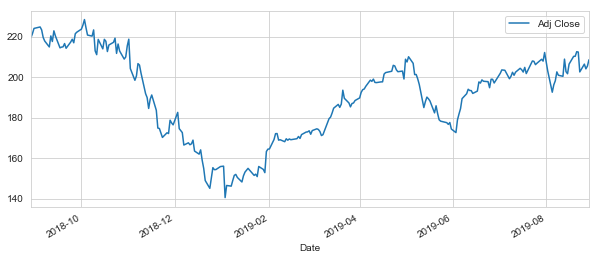

In [9]:
# Let's see a historical view of the closing price
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

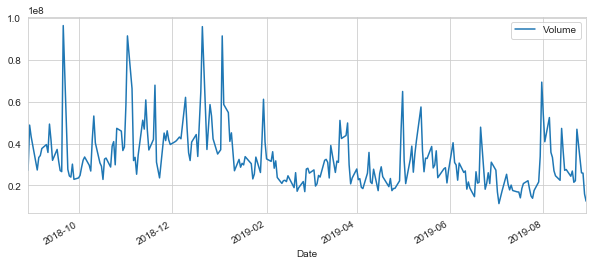

In [10]:
# Now let's plot the total volume of stock being traded each day over the past 5 years
AAPL['Volume'].plot(legend=True,figsize=(10,4))

Now that we've seen the visualizations for the closing price and the volume traded each day, let's go ahead and caculate the moving average for the stock.

In [13]:
# Pandas has a built-in rolling mean calculator

# Plotting out several moving averages
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    AAPL[column_name]=AAPL['Adj Close'].rolling(ma).mean()


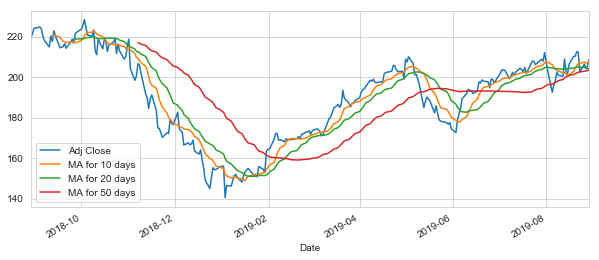

In [14]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

2)
Baseline analysis is complete now, let's go ahead and dive a little deeper. We're now going to analyze the risk of the stock. In order to do so we'll need to take a closer look at the daily changes of the stock, and not just its absolute value. We will use pandas to retrieve tech daily returns for the Apple stock.

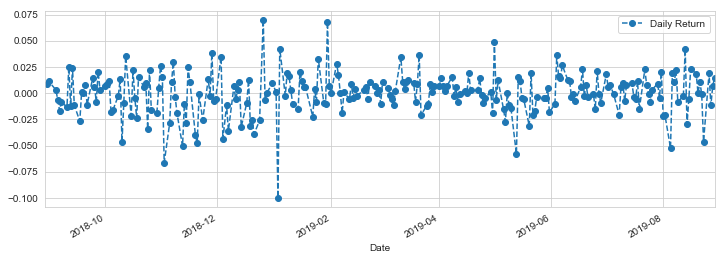

In [16]:
#We'll use pct_change to find the percent change for each day
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()
# Plotting the daily return percentage
AAPL['Daily Return'].plot(figsize=(12,4),legend=True,linestyle='--',marker='o')

Now let's get an overall look at the average daily return using a histogram. We'll use seaborn to create both a histogram and kde plot on the same figure.

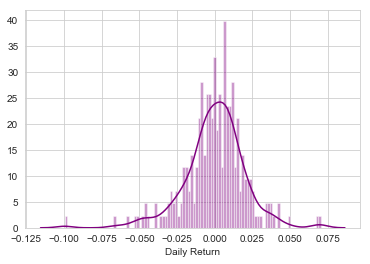

In [17]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

# Could have also done:
#AAPL['Daily Return'].hist()

Now we will analyze the returns of all the stocks in our list.
Let's go ahead and build a DataFrame with all the ['Close'] columns for each of the stocks dataframes.

In [19]:
# Grab all the closing prices for the tech stock list into one DataFrame
closing_df = data.DataReader(['AAPL','GOOG','MSFT','AMZN'],'yahoo',start,end)['Adj Close']

In [72]:
closing_df.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2018-08-29,219.572723,1998.099976,1249.300049,110.286972
2018-08-30,221.591385,2002.380005,1239.119995,110.218056
2018-08-31,224.151657,2012.709961,1218.189941,110.592186
2018-09-04,224.870499,2039.510010,1197.000000,109.981766
2018-09-05,223.403275,1994.819946,1186.479980,106.811584


Now that we have all the closing prices, We can get the daily return for all the stocks, like we did for the Apple stock.

In [21]:
# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()

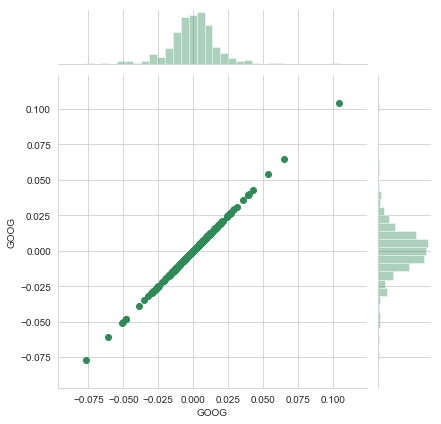

In [23]:
#Comparing Google to itself should show a perfectly linear relationship
sns.jointplot('GOOG','GOOG',tech_rets,kind='scatter',color='seagreen')

So now we can see that if two stocks are perfectly (and positivley) correlated with each other a linear relationship bewteen its daily return values should occur. Let's go ahead and compare Google and Microsoft the same way.

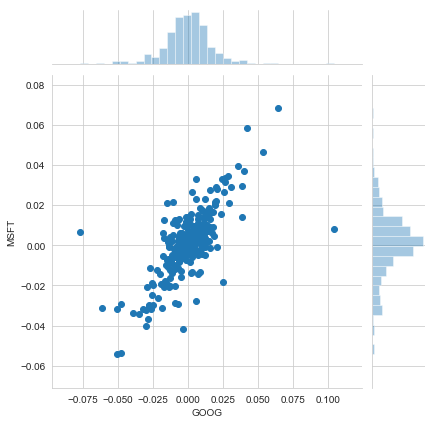

In [24]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot('GOOG','MSFT',tech_rets,kind='scatter')

The pearsonr value (officially known as the Pearson product-moment correlation coefficient) gives us a sense of how correlated the daily percentage returns are.

Seaborn and pandas make it very easy to repeat this comparison analysis for every possible combination of stocks in our technology stock ticker list. We can use sns.pairplot() to automatically create this plot

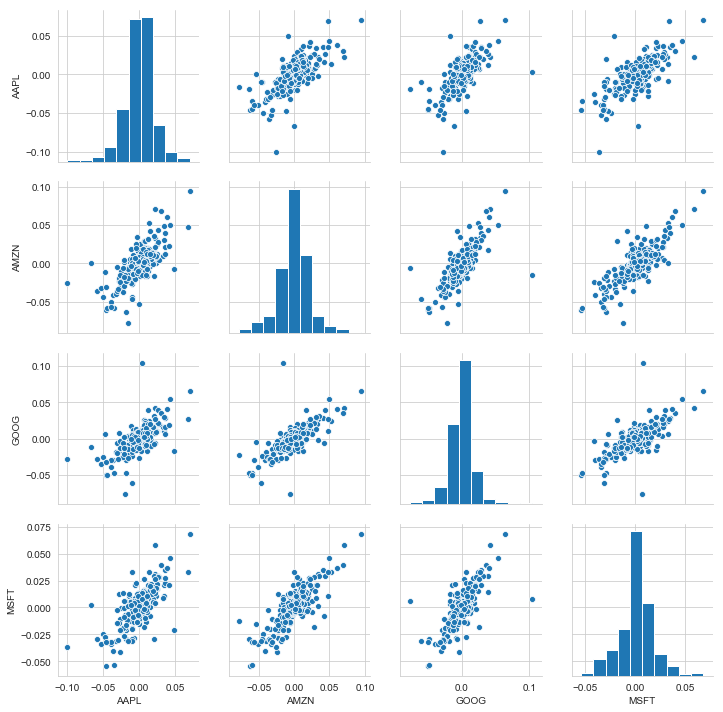

In [25]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis of all the comparisons
sns.pairplot(tech_rets.dropna())

Above we can see all the relationships on daily returns between all the stocks. A quick glance shows an interesting correlation between Google and Amazon daily returns. It might be interesting to investigate that individual comaprison. 

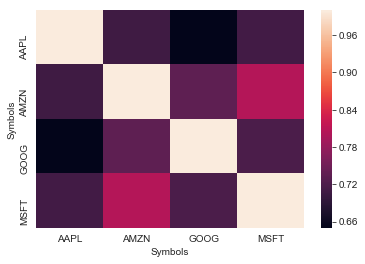

In [29]:
# Let's go ahead and use seabornfor a quick correlation plot for the daily returns
corr = tech_rets.dropna().corr()
sns.heatmap(corr, xticklabels=corr.columns,yticklabels=corr.columns)

Risk Analysis
There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.

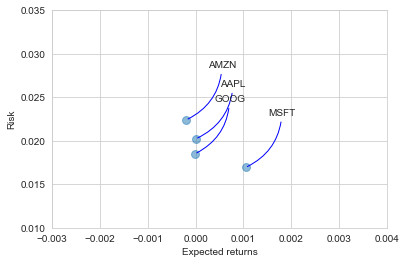

In [60]:
# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_rets DataFrame
rets = tech_rets.dropna()

area = np.pi*20

plt.scatter(rets.mean(), rets.std(),alpha = 0.5,s =area)

# Set the x and y limits of the plot (optional, remove this if you don't see anything in your plot)
plt.ylim([0.01,0.035])
plt.xlim([-0.003,0.004])

#Set the plot axis titles
plt.xlabel('Expected returns')
plt.ylabel('Risk')

# Label the scatter plots, for more info on how this is done, chekc out the link below
# http://matplotlib.org/users/annotations_guide.html
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3',color='b'))


Value at risk using the "bootstrap" method
For this method we will calculate the empirical quantiles from a histogram of daily returns. 

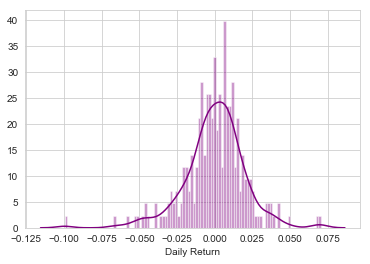

In [62]:
#Wee use dropna() here, otherwise the NaN values can't be read by seaborn
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

In [63]:
# The 0.05 empirical quantile of daily returns
rets['AAPL'].quantile(0.05)

-0.03314964823286293

The 0.05 empirical quantile of daily returns is at -0.033. That means that with 95% confidence, our worst daily loss will not exceed 3.3%. 

Value at Risk using the Monte Carlo method

To demonstrate a basic Monte Carlo method, we will start with just a few simulations. First we'll define the variables we'll be using the Google DataFrame GOOG

In [64]:
# Set up our time horizon
days = 365

# Now our delta
dt = 1/days

# Now let's grab our mu (drift) from the expected return data we got for AAPL
mu = rets.mean()['GOOG']

# Now let's grab the volatility of the stock from the std() of the average return
sigma = rets.std()['GOOG']

In [65]:
def stock_monte_carlo(start_price,days,mu,sigma):
    ''' This function takes in starting stock price, days of simulation,mu,sigma, and returns simulated price array'''
    
    # Define a price array
    price = np.zeros(days)
    price[0] = start_price
    # Schok and Drift
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # Run price array for number of days
    for x in xrange(1,days):
        
        # Calculate Schock
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        # Calculate Drift
        drift[x] = mu * dt
        # Calculate Price
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

Text(0.5,1,'Monte Carlo Analysis for Google')

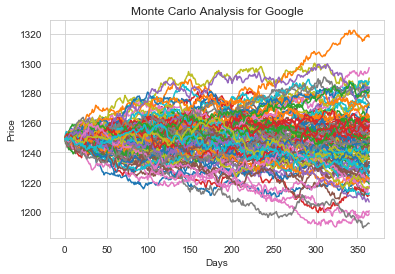

In [74]:
# Get start price from GOOG.head()
start_price = 1249.30

for run in xrange(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Google')

In [75]:
# Number Of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

# Set the print options of numpy to only display 0-5 points from an array to suppress output
np.set_printoptions(threshold=5)

for run in xrange(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1];

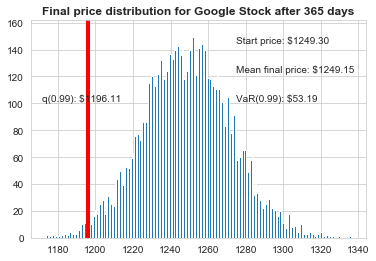

In [76]:
#Now we will define q as the 1% empirical qunatile, this basically means that 99% of the values
#should fall between here
q = np.percentile(simulations, 1)
    
# Now let's plot the distribution of the end prices
plt.hist(simulations,bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold');

Awesome! Now we have looked at the 1% empirical quantile of the final price distribution to estimate the Value at Risk for the Google stock, which looks to be $53.19 for every investment of 1249.15 (the price of one inital google stock).

This basically means for every initial stock you purchase your putting about $53.19 at risk 99% of the time from our Monte Carlo Simulation.

